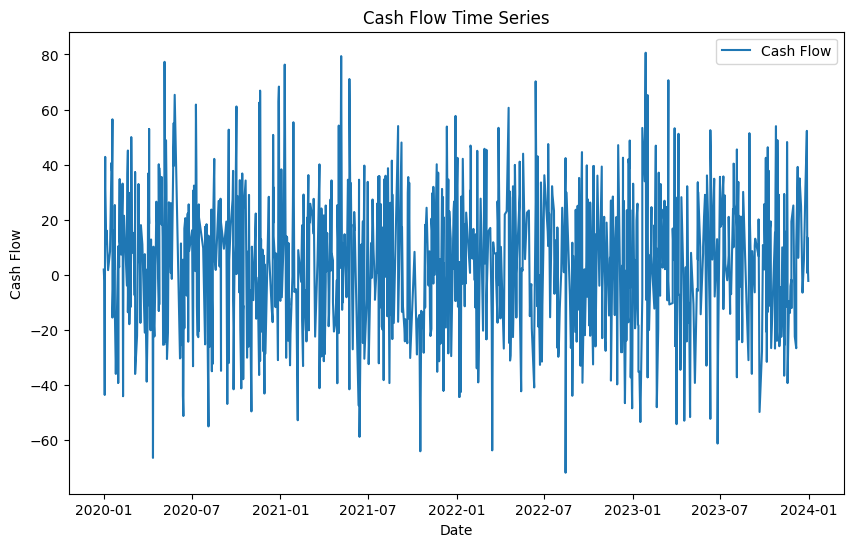

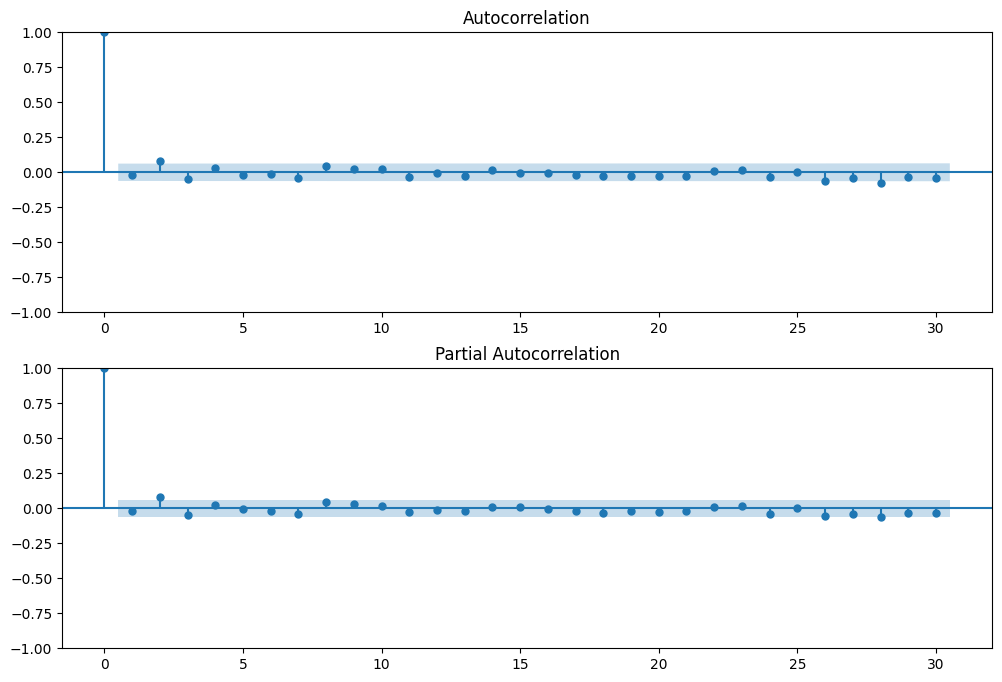

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE: 24.97442512018824


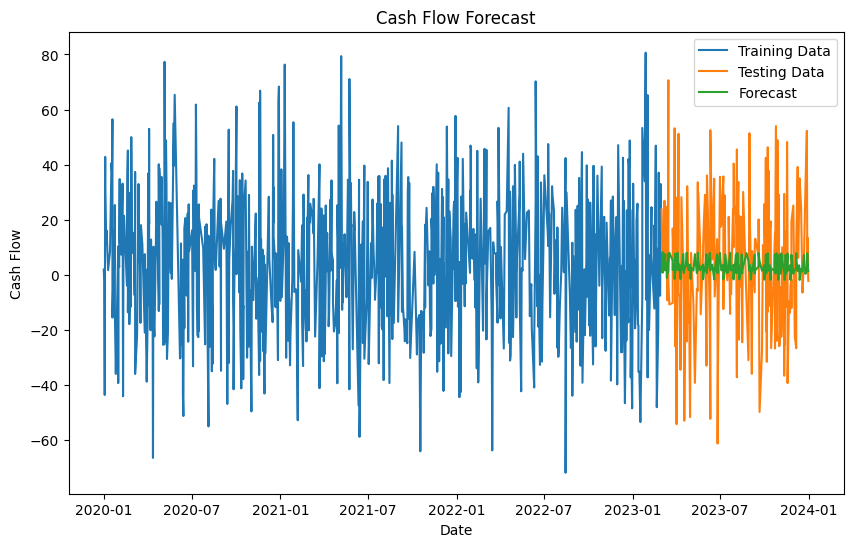

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


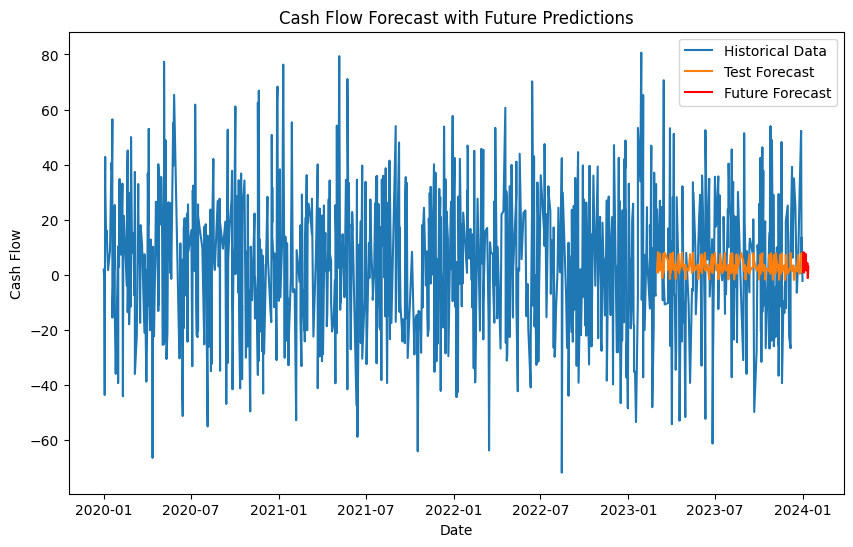

Future Forecasted Values:
            Forecasted Cash Flow
Date                            
2024-01-01              1.161633
2024-01-02              8.269561
2024-01-03              0.844538
2024-01-04              2.035200
2024-01-05              2.504736
2024-01-06              7.733146
2024-01-07              5.710812
2024-01-08              1.669057
2024-01-09              2.217234
2024-01-10              4.316065
2024-01-11             -1.121576
2024-01-12              2.976620


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tools.eval_measures import rmse

# Load your cash flow data into a pandas DataFrame
df = pd.read_excel('/content/time.xlsx', parse_dates=['Date'], index_col='Date')

# Optional: Perform any necessary data preprocessing (e.g., handling missing values)
# For example, filling missing values with forward fill method
df['Cash Flow'].fillna(method='ffill', inplace=True)

# Plot the time series to visualize trends and seasonality
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Cash Flow'], label='Cash Flow')
plt.title('Cash Flow Time Series')
plt.xlabel('Date')
plt.ylabel('Cash Flow')
plt.legend()
plt.show()

# Check for stationarity
# Optional: If the data is not stationary, apply differencing
# For example, df['Cash Flow Diff'] = df['Cash Flow'].diff().dropna()

# Plot ACF and PACF to determine SARIMA orders
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Cash Flow'], ax=ax[0], lags=30)
plot_pacf(df['Cash Flow'], ax=ax[1], lags=30)
plt.show()

# Define SARIMA parameters based on ACF and PACF plots
# Example orders (p, d, q): (1, 1, 1)
# Example seasonal orders (P, D, Q, s): (1, 1, 1, 12)

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Fit SARIMAX model
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
model = SARIMAX(train_data['Cash Flow'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Forecast
forecast_start = len(train_data)
forecast_end = forecast_start + len(test_data) - 1
forecast = results.predict(start=forecast_start, end=forecast_end, dynamic=False)

# Evaluate forecast
print("RMSE:", rmse(test_data['Cash Flow'], forecast))

# Plot actual vs. forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Cash Flow'], label='Training Data')
plt.plot(test_data.index, test_data['Cash Flow'], label='Testing Data')
plt.plot(test_data.index, forecast, label='Forecast')
plt.title('Cash Flow Forecast')
plt.xlabel('Date')
plt.ylabel('Cash Flow')
plt.legend()
plt.show()

# Forecast future values beyond the test data
future_steps = 12  # Number of future periods to forecast
future_forecast = results.get_forecast(steps=future_steps)
future_index = pd.date_range(start=test_data.index[-1], periods=future_steps + 1, freq='d')[1:]

# Create a DataFrame for the future forecasted values
future_forecast_df = pd.DataFrame({'Date': future_index, 'Forecasted Cash Flow': future_forecast.predicted_mean})
future_forecast_df.set_index('Date', inplace=True)

# Plot the forecasted future values along with the original data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Cash Flow'], label='Historical Data')
plt.plot(test_data.index, forecast, label='Test Forecast')
plt.plot(future_forecast_df.index, future_forecast_df['Forecasted Cash Flow'], label='Future Forecast', color='red')
plt.title('Cash Flow Forecast with Future Predictions')
plt.xlabel('Date')
plt.ylabel('Cash Flow')
plt.legend()
plt.show()

# Display the future forecasted values
print("Future Forecasted Values:")
print(future_forecast_df)
